In [1]:
import Pkg; Pkg.activate()

using Dates, DataFrames, Distributions, Extremes, Gadfly, Random
# import Pkg
# Pkg.add(url = "https://github.com/jojal5/Extremes.jl", rev = "bug/joss-doc-fix")

    Updating git-repo `https://github.com/jojal5/Extremes.jl`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
# For exporting the figures
# using Cairo, Fontconfig

# 3. Package overview

## 3.1 Loading the Port Pirie data

In [3]:
data = Extremes.dataset("portpirie")
first(data,5)

Row,Year,SeaLevel
,Int64,Float64
1,1923,4.03
2,1924,3.83
3,1925,3.65
4,1926,3.88
5,1927,4.01


In [4]:
# Figure 1

set_default_plot_size(12cm, 8cm)
fig1 = plot(data, x=:Year, y=:SeaLevel, Geom.line,
    Guide.ylabel("Sea level annual maxima (m)"))

draw(PDF("Figures/port_pirie.png", 12cm, 8cm), fig1)


## 3.2 Block maxima model

In [5]:
fm = gevfit(data, :SeaLevel)

MaximumLikelihoodAbstractExtremeValueModel
model :
	BlockMaxima{GeneralizedExtremeValue}
	data :		Vector{Float64}[65]
	location :	μ ~ 1
	logscale :	ϕ ~ 1
	shape :		ξ ~ 1

θ̂  :	[3.874750223091266, -1.6192723640210762, -0.05010719929448139]


In [6]:
V = parametervar(fm)

3×3 Matrix{Float64}:
  0.000780204   0.000995016  -0.0010741
  0.000995016   0.0104541    -0.00392576
 -0.0010741    -0.00392576    0.00965404

In [7]:
# Figure 2
set_default_plot_size(21cm ,16cm)
fig2 = diagnosticplots(fm)

draw(PDF("Figures/gev_mle.png", 21cm, 16cm), fig2)

In [8]:
r = returnlevel(fm, 100)

ReturnLevel
returnperiod :	100
value :		Vector{Float64}[1]


In [9]:
r.value

1-element Vector{Float64}:
 4.688403360432851

In [10]:
cint(r, .95)

1-element Vector{Vector{Real}}:
 [4.377121171613511, 4.999685549252191]

## 3.3 Nonstationary block maxima model

In [11]:
fm₁ = gevfit(data, :SeaLevel, locationcovid = [:Year])

MaximumLikelihoodAbstractExtremeValueModel
model :
	BlockMaxima{GeneralizedExtremeValue}
	data :		Vector{Float64}[65]
	location :	μ ~ 1 + Year
	logscale :	ϕ ~ 1
	shape :		ξ ~ 1

θ̂  :	[4.568356786108704, -0.0003547310197546491, -1.6196104648710474, -0.050460448403627546]


In [12]:
# Figure 3
set_default_plot_size(21cm ,16cm)
fig3 = diagnosticplots(fm₁)

draw(PDF("Figures/portpirie_vs_year_diagnostics.png", 21cm, 16cm), fig3)

In [13]:
r = returnlevel(fm₁, 100)

ReturnLevel
returnperiod :	100
value :		Vector{Float64}[65]


In [14]:
c = cint(r, .95)

65-element Vector{Vector{Real}}:
 [4.379917530288087, 5.017986382505078]
 [4.380166738105258, 5.017027712648398]
 [4.380395987504068, 5.016089001210078]
 [4.380605168279979, 5.015170358394657]
 [4.380794173244357, 5.01427189139077]
 [4.380962898319573, 5.013393704276045]
 [4.381111242632467, 5.012535897923642]
 [4.3812391086060085, 5.011698569910591]
 [4.381346402048962, 5.010881814428128]
 [4.381433032243377, 5.010085722194203]
 [4.381498912029735, 5.009310380368338]
 [4.381543957889555, 5.0085558724690085]
 [4.381568090025303, 5.007822278293751]
 ⋮
 [4.364134662777876, 4.9961677619212965]
 [4.363264421382308, 4.9963285412773555]
 [4.362373860325849, 4.996509640294305]
 [4.361463082445988, 4.996710956134656]
 [4.360532193727918, 4.996932382813217]
 [4.359581303210049, 4.997173811291576]
 [4.3586105228880125, 4.997435129574104]
 [4.357619967617325, 4.997716222805282]
 [4.356609755014902, 4.998016973368197]
 [4.355580005359585, 4.998337260984005]
 [4.3545308414918775, 4.998676962812203]

In [15]:
# Figure 4

df = DataFrame(Year = data.Year, ReturnLevel=r.value, LowerBound=first.(c), UpperBound=last.(c))

set_default_plot_size(12cm, 9cm)
fig4 = plot(df, x=:Year, y=:ReturnLevel, Geom.line,
    ymin=:LowerBound, ymax=:UpperBound, Geom.ribbon,
    Guide.ylabel("100-year effective return level (m)"))

draw(PDF("Figures/portpirie_ns_returnlevel.pdf", 12cm, 9cm), fig4)


# 7. Examples

## 7.1. Threshold exceedances approach

In [16]:
data = Extremes.dataset("rain")
first(data, 5)

Row,Date,Rainfall
,Date,Float64
1,1914-01-01,0.0
2,1914-01-02,2.3
3,1914-01-03,1.3
4,1914-01-04,6.9
5,1914-01-05,4.6


In [17]:
# Figure 6

set_default_plot_size(12cm, 8cm)
fig6 = plot(data, x=:Date, y=:Rainfall, Geom.point,
    Guide.ylabel("Rainfall (mm)"),
    Theme(discrete_highlight_color=c->nothing))

draw(PDF("Figures/rainfall.pdf", 12cm, 8cm), fig6)

### Threshold selection and exceedances extraction

In [18]:
# Figure 7a

set_default_plot_size(12cm, 8cm)
fig7a = mrlplot(data.Rainfall)

draw(PDF("Figures/mrl_plot.pdf", 12cm, 8cm), fig7a)


In [19]:
threshold = 30.

30.0

In [20]:
df_exceedance = filter(row -> row.Rainfall > threshold, data)
df_exceedance.Exceedance = df_exceedance.Rainfall .- threshold
select!(df_exceedance, :Date, :Exceedance)
first(df_exceedance, 5)

Row,Date,Exceedance
,Date,Float64
1,1914-02-07,1.8
2,1914-03-08,2.5
3,1914-12-17,1.8
4,1914-12-30,14.5
5,1915-02-13,0.5


In [21]:
# Figure 7b

set_default_plot_size(12cm, 8cm)
fig7b = plot(df_exceedance, x=:Date, y=:Exceedance, Geom.point)

draw(PDF("Figures/ns_gp_rain.pdf", 12cm, 8cm), fig7b)

### Bayesian inference

In [22]:
Random.seed!(4786)
fm = gpfitbayes(df_exceedance, :Exceedance)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


BayesianAbstractExtremeValueModel
model :
	ThresholdExceedance
	data :		Vector{Float64}[152]
	logscale :	ϕ ~ 1
	shape :		ξ ~ 1

sim :
	MambaLite.Chains
	Iterations :		2001:5000
	Thinning interval :	1
	Chains :		1
	Samples per chain :	3000
	Value :			Array{Float64, 3}[3000,2,1]


In [23]:
parametervar(fm)

2×2 Matrix{Float64}:
  0.0159957   -0.00872691
 -0.00872691   0.0112411

In [24]:
cint(fm, 0.95)

2-element Vector{Vector{Float64}}:
 [1.741359021116782, 2.2317228466225454]
 [0.023208017964946023, 0.42893651230000507]

In [25]:
# Figure 8

set_default_plot_size(12cm ,10cm)
p1 = plot(y = Extremes.scale(fm), Geom.line,
    Guide.xlabel("Iteration"), Guide.ylabel("σ"))

p2 = plot(y = Extremes.shape(fm), Geom.line,
    Guide.xlabel("Iteration"), Guide.ylabel("ξ"))

fig8 = vstack(p1, p2)

draw(PDF("Figures/mcmc_chainsv2.pdf", 12cm, 10cm), fig8)


In [26]:
# Figure 9

set_default_plot_size(21cm ,16cm)
fig9 = diagnosticplots(fm)

draw(PDF("Figures/gpfitbayes.pdf", 21cm, 16cm), fig9)

### Return level estimation

In [27]:
nobs = size(data,1)
nobsperblock = 365
r = returnlevel(fm, threshold, nobs, nobsperblock, 100)

ReturnLevel
returnperiod :	100
value :		Matrix{Float64}[3000]


In [28]:
c = cint(r, 0.95)

1-element Vector{Vector{Real}}:
 [74.05754623764554, 180.71369975075712]

## 7.2 Declustering threshold exceedances

In [29]:
data = Extremes.dataset("wooster")
first(data, 5)

Row,Date,Temperature
,Date,Int64
1,1983-01-01,23
2,1983-01-02,29
3,1983-01-03,19
4,1983-01-04,14
5,1983-01-05,27


In [30]:
df = copy(data)
df[!,:Temperature] = -data[:,:Temperature]
filter!(row -> month(row.Date) ∈ (1,2,11,12), df)
first(df, 5)

Row,Date,Temperature
,Date,Int64
1,1983-01-01,-23
2,1983-01-02,-29
3,1983-01-03,-19
4,1983-01-04,-14
5,1983-01-05,-27


In [31]:
# Figure 10

set_default_plot_size(12cm, 8cm)
fig10 = plot(df, x=:Date, y=:Temperature, Geom.point)

draw(PDF("Figures/clusters2.pdf", 12cm, 8cm), fig10)

### The runs method

In [32]:
threshold = -10.0
cluster = getcluster(df[:,:Temperature], threshold, runlength=4)
first(cluster)

Cluster
u₁: -10.0
u₂: -10.0
position: [17, 18, 19, 20]
value: [-6, -5, -6, -1]


In [33]:
z = maximum.(cluster)

17-element Vector{Int64}:
 -1
 -7
 13
 16
 -1
 -6
 -8
 19
 -4
  2
 -3
  1
 -1
 -4
 -6
  3
 -7

### The two thresholds method

In [34]:
u₁ = -10.0
u₂ = -15.0
cluster = getcluster(df[:,:Temperature], u₁, u₂)
first(cluster)

Cluster
u₁: -10.0
u₂: -15.0
position: [16, 17, 18, 19, 20]
value: [-13, -6, -5, -6, -1]


In [35]:
z = maximum.(cluster)

27-element Vector{Int64}:
 -1
 -7
 13
  4
 -3
  0
 16
 -1
 -6
 -8
  1
 19
 -7
  ⋮
 -4
 -8
  2
  2
 -5
 -3
  1
 -1
 -4
 -6
  3
 -7

## 7.3. Nonstationary block maxima approach

In [36]:
data = Extremes.dataset("fremantle")
first(data, 5)

Row,Year,SeaLevel,SOI
,Int64,Float64,Float64
1,1897,1.58,-0.67
2,1898,1.71,0.57
3,1899,1.4,0.16
4,1900,1.34,-0.65
5,1901,1.43,0.06


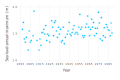

In [37]:
# Figure 11a

set_default_plot_size(12cm, 8cm)
fig11a = plot(data, x=:Year, y=:SeaLevel, Geom.point,
    Coord.cartesian(xmin=1895, xmax=1990), Guide.xticks(ticks=1895:10:1990),
    Guide.ylabel("Sea level annual maximum (m)"))

# draw(PDF("Figures/seaLevel_vs_year.pdf", 12cm, 8cm), fig11a)


In [38]:
# Figure 11b

set_default_plot_size(12cm, 8cm)
fig11b = plot(data, x=:SOI, y=:SeaLevel, Geom.point,
    Guide.ylabel("Sea level annual maximum (m)"))

draw(PDF("seaLevel_vs_SOI.pdf", 12cm, 8cm), fig11b)

### Maximum likelihood parameter estimation

In [39]:
fm₀ = gevfit(data, :SeaLevel)
fm₁ = gevfit(data, :SeaLevel, locationcovid = [:Year])
fm₂ = gevfit(data, :SeaLevel, locationcovid = [:Year, :SOI])
fm₃ = gevfit(data, :SeaLevel, locationcovid = [:Year, :SOI], logscalecovid = [:Year, :SOI])

MaximumLikelihoodAbstractExtremeValueModel
model :
	BlockMaxima{GeneralizedExtremeValue}
	data :		Vector{Float64}[86]
	location :	μ ~ 1 + Year + SOI
	logscale :	ϕ ~ 1 + Year + SOI
	shape :		ξ ~ 1

θ̂  :	[-2.215213912601999, 0.0019067329692207917, 0.06592556257024981, 6.760912614047801, -0.004564874869909601, 0.26512520665238254, -0.22292401254869737]


In [40]:
# Figure 12

set_default_plot_size(21cm, 16cm)
fig12 = diagnosticplots(fm₂)

draw(PDF("Figures/diag_ns.pdf",21cm, 16cm), fig12)

In [41]:
parametervar(fm₂)

5×5 Matrix{Float64}:
  1.02181      -0.000524501   6.71532e-5    0.0127779    -0.0209508
 -0.000524501   2.69285e-7   -1.61708e-8   -6.4457e-6     1.05896e-5
  6.71532e-5   -1.61708e-8    0.00038545    0.000239274  -0.000355337
  0.0127779    -6.4457e-6     0.000239274   0.00703707   -0.00256783
 -0.0209508     1.05896e-5   -0.000355337  -0.00256783    0.00444377

In [42]:
cint(fm₂, 0.95)

5-element Vector{Vector{Float64}}:
 [-4.607209165944587, -0.6447744599859129]
 [0.0010969546332642332, 0.0031311107401406028]
 [0.01603794386329232, 0.09299743628807014]
 [-2.2785980179345944, -1.9497660238399137]
 [-0.2806398353854724, -0.019331212471259906]

### Return level estimation

In [43]:
r = returnlevel(fm₂, 100)

ReturnLevel
returnperiod :	100
value :		Vector{Float64}[86]


In [44]:
c = cint(r, .95)

86-element Vector{Vector{Real}}:
 [1.6464829066065279, 1.8515044599835773]
 [1.725103613426093, 1.9123156899251075]
 [1.7048688798346272, 1.8920739830279185]
 [1.655037948804987, 1.857814321508361]
 [1.7037278450906301, 1.8907676105035889]
 [1.731775721693051, 1.9158803705100365]
 [1.7297984243804043, 1.9133629027839798]
 [1.580957200767417, 1.8298254168419144]
 [1.7237707347957327, 1.9071300008867023]
 [1.732993738883596, 1.9150859579577575]
 [1.7352979919455267, 1.9170097702692308]
 [1.6596572484134509, 1.8690404847323188]
 [1.6678169167958588, 1.8747887161042887]
 ⋮
 [1.8327412493252153, 2.048062503166687]
 [1.8481707419051616, 2.0608488595934435]
 [1.8274829082394746, 2.04760237557956]
 [1.8597909538369586, 2.072949731629649]
 [1.7587332274998893, 2.0146824531130787]
 [1.7972453511795259, 2.034916084882529]
 [1.8523402194326664, 2.071277586123882]
 [1.85820120093417, 2.0772771466063795]
 [1.8440901683740483, 2.068357399502065]
 [1.7646548289729522, 2.0266301171024996]
 [1.907329803

In [45]:
# Figure 13

df = DataFrame(Year = data.Year, ReturnLevel=r.value, LowerBound=first.(c), UpperBound=last.(c))

set_default_plot_size(12cm, 9cm)
fig13 = plot(df, x=:Year, y=:ReturnLevel, Geom.line,
    ymin=:LowerBound, ymax=:UpperBound, Geom.ribbon,
    Coord.cartesian(xmin=1895, xmax=1985), Guide.xticks(ticks=1895:10:1985),
    Guide.ylabel("100-year effective return level (m)"))

draw(PDF("Figures/rv100-2.pdf", 12cm, 9cm), fig13)

## 7.4. Nonstationary threshold exceedances approach

In [46]:
data = Extremes.dataset("rain")
first(data,5)

Row,Date,Rainfall
,Date,Float64
1,1914-01-01,0.0
2,1914-01-02,2.3
3,1914-01-03,1.3
4,1914-01-04,6.9
5,1914-01-05,4.6


In [47]:
threshold = 30.0
df = filter(row -> row.Rainfall > threshold, data)
df[!,:Exceedance] = df[:,:Rainfall] .- threshold
df[!,:Year] = year.(df[:,:Date])
first(df, 5)

Row,Date,Rainfall,Exceedance,Year
,Date,Float64,Float64,Int64
1,1914-02-07,31.8,1.8,1914
2,1914-03-08,32.5,2.5,1914
3,1914-12-17,31.8,1.8,1914
4,1914-12-30,44.5,14.5,1914
5,1915-02-13,30.5,0.5,1915


### Bayesian inference

In [48]:
Random.seed!(4786)
fm₁ = gpfitbayes(df, :Exceedance, logscalecovid = [:Year])

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


BayesianAbstractExtremeValueModel
model :
	ThresholdExceedance
	data :		Vector{Float64}[152]
	logscale :	ϕ ~ 1 + Year
	shape :		ξ ~ 1

sim :
	MambaLite.Chains
	Iterations :		2001:5000
	Thinning interval :	1
	Chains :		1
	Samples per chain :	3000
	Value :			Array{Float64, 3}[3000,3,1]


In [49]:
# Figure 14

set_default_plot_size(21cm, 16cm)
fig14 = diagnosticplots(fm₁)

draw(PDF("Figures/ns_gp_bayes.pdf", 21cm, 16cm), fig14)

In [50]:
parametervar(fm₁)

3×3 Matrix{Float64}:
 191.176      -0.0984553    -0.233726
  -0.0984553   5.07087e-5    0.000115646
  -0.233726    0.000115646   0.0120374

In [51]:
cint(fm₁, .95)

3-element Vector{Vector{Float64}}:
 [-40.12690570862149, 14.301578750708021]
 [-0.006232351420300558, 0.021808851373477853]
 [0.0431504150610775, 0.46944281177836833]

### Return level estimation

In [52]:
nobs = size(data,1)
nobsperblock = 365
r = returnlevel(fm₁, threshold, nobs, nobsperblock, 100)

ReturnLevel
returnperiod :	100
value :		Matrix{Float64}[456000]


In [53]:
c = cint(r, 0.95)

152-element Vector{Vector{Real}}:
 [64.00714161260925, 165.2466567150216]
 [64.00714161260925, 165.2466567150216]
 [64.00714161260925, 165.2466567150216]
 [64.00714161260925, 165.2466567150216]
 [64.29427316943381, 165.98626436824284]
 [64.29427316943381, 165.98626436824284]
 [64.29427316943381, 165.98626436824284]
 [64.58382905617881, 165.91978690514705]
 [64.58382905617881, 165.91978690514705]
 [64.58382905617881, 165.91978690514705]
 [64.87582974212216, 166.40139176377681]
 [64.87582974212216, 166.40139176377681]
 [64.91812692151467, 166.60563318035392]
 ⋮
 [78.98980844275218, 224.45454616159515]
 [78.98980844275218, 224.45454616159515]
 [78.98980844275218, 224.45454616159515]
 [79.417969431701, 227.47320290957626]
 [79.417969431701, 227.47320290957626]
 [79.417969431701, 227.47320290957626]
 [79.417969431701, 227.47320290957626]
 [79.417969431701, 227.47320290957626]
 [80.06542267339992, 231.15529027677152]
 [80.06542267339992, 231.15529027677152]
 [79.00750079428289, 233.062248649

In [54]:
# Figure 15

df_plot = DataFrame(Year = df.Year, ReturnLevel=vec(mean(r.value, dims=1)), LowerBound=first.(c), UpperBound=last.(c))

set_default_plot_size(12cm, 9cm)
fig15 = plot(df_plot, x=:Year, y=:ReturnLevel, Geom.line,
    ymin=:LowerBound, ymax=:UpperBound, Geom.ribbon,
    Guide.ylabel("100-year effective return level (mm)"))

draw(PDF("Figures/rv100-ns2-bayes.pdf", 12cm, 9cm), fig15)